<h1 style="text-align: center;"><b>Heston model for the volatility surface</b></h1>

#### Roland Grinis - MIPT & GrinisRIT
#### Ivan Novikov - MIPT
#### Maksim Sosnin - MIPT

This is a stochastic volatility model for the forward dynamics in the risk neutral measure, and CIR dynamics for the variance:
$$
\begin{split}
\text{d}f_t & =  \sqrt{\alpha_t} f_t \text{d}W_t^1  \\
\text{d}\alpha_t & =  \kappa (\theta - \alpha_t)\text{d}t + \xi \sqrt{\alpha_t} \left( \rho \text{d}W_t^1 + \sqrt{1-\rho^2} \text{d}W_t^2 \right)  
\end{split}
$$

The vol correlation obeys $-1 < \rho < 1$  as previously, and we impose the Feller condition:
$$
2\kappa\theta > \xi ^2
$$
to ensure that the volatility $\sigma_t$ stays strictly positive.

The forward price of a call option is given by:
$$
FV_C(t_0, T, K) = f_{t_0} H(\sqrt{-1}) - K \cdot H(0) 
$$
where:
$$
H(z) = \frac{1}{2} + \frac{1}{\pi} \int^{\infty}_0 \mathbf{Re} \left[ \frac{e^{u\sqrt{-1} \log \frac{f_{t_0}}{K}}}{u\sqrt{-1}} \phi(u-z,T) \right]\text{d}u
$$
with 
$$
\phi(u,T) = \exp \left( - \frac{\kappa\bar{\alpha}\rho T u\sqrt{-1} }{\nu} - A + \frac{2 \kappa \bar{\alpha} }{\nu^2}D\right)
$$
where $A = A_1 / A_2$:
$$
A_1 = (u^2 + u\sqrt{-1}) \sinh \frac{\lambda T}{2}, \quad \lambda = \left( \xi^2 + \nu^2 (u^2 + u\sqrt{-1})\right)^{\frac{1}{2}}, \quad \xi = \kappa - \nu\rho u\sqrt{-1} 
$$
and 
$$
\log A_2 = \frac{\lambda T}{2} + \log \left( \frac{\lambda +\xi}{2 \alpha_{t_0}} + \frac{\lambda  - \xi}{2\alpha_{t_0}}e^{-\lambda T}\right)
$$
with
$$
D = \log \frac{\lambda}{\alpha_{t_0}} + \frac{\kappa T}{2} - \log A_2.
$$
The integral above can be truncated to $(0,200)$ and evaluated via Gaussian quadrature at 64 nodes for $10^{-10}$ accuracy.

# Heston Simulation

$$
\begin{aligned}
d \ln X(t) & =-\frac{1}{2} V(t) d t+\sqrt{V(t)} d W_X(t) \\
d V(t) & =\kappa(\theta-V(t)) d t+\varepsilon \sqrt{V(t)} d W_V(t)
d W_X(t) d W_X(t) = 0
\end{aligned}
$$

### Euler Discretization Scheme

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t) \Delta+\sqrt{\hat{V}(t)} Z_X \sqrt{\Delta}, \\
\hat{V}(t+\Delta) & =V(t)+\kappa(\theta-\hat{V}(t)) \Delta+\varepsilon \sqrt{\hat{V}(t)} Z_V \sqrt{\Delta},
\end{aligned}
$$

where $Z_X$ and $Z_V$ are standardized Gaussian variables with correlation $\rho$. So they can be computed as follows:

$$
\begin{aligned}
& Z_V=\Phi^{-1}\left(U_1\right), \\
& Z_X=\rho Z_V+\sqrt{1-\rho^2} \Phi^{-1}\left(U_2\right).
\end{aligned}
$$

($U_1$ and $U_2$ are independent uniform samples, and $Φ^{−1}$ is the inverse cumulative
Gaussian distribution function).

However the discrete process for $V$ can become negative with non-zero probability, which in turn would make computation of $\sqrt{\hat{V}}$ impossible and cause the time-stepping scheme to fail. The scheme that appears to produce the smallest discretization bias can be written on the form:

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t)^{+} \Delta+\sqrt{\hat{V}(t)^{+}} Z_X \sqrt{\Delta} \\
\hat{V}(t+\Delta) & =\hat{V}(t)+\kappa\left(\theta-\hat{V}(t)^{+}\right) \Delta+\varepsilon \sqrt{\hat{V}(t)^{+}} Z_V \sqrt{\Delta},
\end{aligned}
$$
where we use the notation $x^{+}=\max (x, 0)$.

### Bias free Scheme

To obtain a bias-free scheme for sampling the asset price process, first integrate the SDE for $V(t)$, to yield
$$
V(t+\Delta)=V(t)+\int_t^{t+\Delta} \kappa(\theta-V(u)) d u+\varepsilon \int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)
$$
or, equivalently,
$$
\int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)=\varepsilon^{-1}\left(V(t+\Delta)-V(t)-\kappa \theta \Delta+\kappa \int_t^{t+\Delta} V(u) d u\right)
$$
A Cholesky decomposition shows that
$$
d \ln X(t)=-\frac{1}{2} V(t) d t+\rho \sqrt{V(u)} d W_V(u)+\sqrt{1-\rho^2} \sqrt{V(u)} d W(u)
$$
where $W$ is a Brownian motion independent of $W_V$. In integral form,
$$
\begin{aligned}
\ln X(t+\Delta)=\ln X(t)+\frac{\rho}{\varepsilon} & (V(t+\Delta)-V(t)-\kappa \theta \Delta) \\
& +\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right) \int_t^{t+\Delta} V(u) d u+\sqrt{1-\rho^2} \int_t^{t+\Delta} \sqrt{V(u)} d W(u)
\end{aligned}
$$

As $W$ is independent of $V$, conditional on $V(t)$ and $\int_t^{t+\Delta} V(u) d u$, the Ito integral $\int_t^{t+\Delta} \sqrt{V(u)} d W(u)$ is Gaussian with mean zero and variance $\int_t^{t+\Delta} V(u) d u$.

### Process for $V$ (CIR)

Non-central chi-squared distribution:
$$
\mathbb{P}\left(V_{t \cdot \Delta}<V \mid V_{t}\right) \quad = \quad F_{\chi^{12}}\left(\frac{4 \kappa V}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)} ; \frac{4 \kappa \theta}{\varepsilon^{2}}, \frac{4 V_{t} \kappa e^{-\kappa \Delta}}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)}\right) \quad
$$


$$
\begin{aligned}
m = \mathbb{E}\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \theta+(\hat{V}(t)-\theta) e^{-\kappa \Delta} \\
s^2 = Var\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \frac{\hat{V}(t) \varepsilon^2 e^{-\kappa \Delta}}{\kappa}\left(1-e^{-\kappa \Delta}\right)+\frac{\theta \varepsilon^2}{2 \kappa}\left(1-e^{-\kappa \Delta}\right)^2
\end{aligned}
$$


### Quadratic exponential (QE) approximation

Switching rule:
- $ V_t \gg 1: \quad V_{t+\Delta} \approx a \left( b + z^v \right)^2 \text{( where } z^v \text{ from } N(0,1)) $
- $V_t \ll 1: \quad f_{V_{t+\Delta}}(v) \approx p \delta(v) + \beta(1-\rho) e^{-\beta v} $

PDF with fast sampling (for $f_{V_{t+\Delta}}(v)$):
$$
\begin{aligned}
F_{V_{t+\Delta}}^{-1}(u) & \approx\left\{\begin{array}{l}
0\ ,\ 0 \leq u \leq p \\
\beta^{-1} \ln \left(\frac{1-p}{1-u}\right)\ ,\ p \leq u \leq 1
\end{array}\right. \\
u & \sim u[0,1]-\text { uniform }
\end{aligned}
$$

### Generating random numbers

Pseudo-random integers:
$$
0 \leq N_k \leq N \quad, \quad N_{k+1} = f(N_k) \equiv N
$$

$$
u \sim u[0,1] \quad , \quad u_k = \frac{N_k}{N}
$$

Box-Muller method:
$$ u_1 u_2 \sim u[0,1] \quad \theta = 2\pi u_2 \quad p = \sqrt{-2 \ln{u_1}} $$

$$ Z_1 = p\cos{\theta} $$
$$ Z_2 = p\sin{\theta} $$
Then $Z_1$ and $Z_2$ are independent random variables with a standard normal distribution $N(0,1).$


### Computing parameters $(a,\ b,\ p,\ \beta)$

$\psi \equiv \frac{S^{2}}{m^{2}} \quad \text { if } \psi \leqslant 2$:
$$
\begin{array}{l}
b^{2}=2 \psi^{-1}-1+\sqrt{2 \psi^{-1}} \sqrt{2 \psi^{-1}-1} \geq 0 \\
a=\frac{m}{1+b^{2}} \rightarrow \\
\rightarrow \text { 2nd moment matching}
\end{array}
$$

if $\psi \geqslant 1$:
$$
\begin{array}{l}
p=\frac{\psi-1}{\psi+2} \in[0,1) \\
\beta=\frac{1-p}{m}=\frac{2}{m(1+\psi)} \rightarrow \\
\rightarrow \text { moment matching at order 2}
\end{array}
$$

Switching rule: $\psi_{c} \in[1,2].$

$$
\begin{array}{l}
Y_{t_{j+1}}^{k}=\hat{V}_{t_{j+1}}^{k}-\hat{V}_{t_{j}}^{k}, \quad \Delta_{1}=t_{j+1}-t_{1}, \quad \hat{V}_{t_{N}}^{k}=\sum_{j=1}^{N} \hat{Y}_{t_{j}}^{k} \\
\Delta=t_{N}-t_{0} ; \quad k=1, \ldots, M \\
\hat{m}_{T}=\frac{1}{M} \sum_{k} \hat{V}_{t_{N}}^{k} \\
\hat{S}_{T}^{2}=\frac{1}{M-1} \sum_{k}\left(\hat{V}_{t_{N}}^{k}-\hat{m}\right)^{2}
\end{array}
$$

### Moment matching technique

$$
\begin{array}{l}
\hat{m}_{T} \quad \quad m_T = \mathbb{E}[V_T \mid V_{t_0}] \\
\hat{S}^{2}_T = S^{2}_T \quad \quad S^{2}_T = Var[V_T \mid V_{t_0}] \rightarrow \\
\rightarrow V^{k}_T = m_T + \frac{S_T}{\hat{S}_T} (\hat{V}{k}_T - \hat{m}_T) = \sum_{j=1}^{N} \left(\frac{m_T}{N} + \frac{S_T}{\hat{S}_T} \left(\hat{Y}^{k}_{t_j} - \frac{m_T}{N}\right)\right)
\end{array}
$$


### Simulating $\ln{X_{t\Delta}}$

Euler Scheme for $\ln{X_{t\Delta}}$ with QE sampling for $V_{t+\Delta}$ leads to CORRELATION LEAKS

Exact simulation is too heavy:
$$
\begin{array}{l}
 \int_{t}^{t+\Delta} V_{u} d u \approx \gamma_{1} V_{t}+\gamma_{2} V_{t+\Delta} \quad \begin{array}{l}
\gamma_{1}+\gamma_{2}=1 \\
\gamma_{1}, \gamma_{2} \geqslant 0
\end{array} \\
\end{array}
$$

Regularity condition:
$$
\mathbb{E}\left(x_{t \cdot \Delta} \mid x_{t}\right)<\infty \Longrightarrow \frac{\rho}{\varepsilon}\left(1+\kappa \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta \rho^{2}<\frac{2 k}{\varepsilon^{2} (1-e^{-\kappa \Delta})}
$$

Natural discretization scheme:
$$
\begin{aligned}
\ln \hat{X}(t+\Delta)= & \ln \hat{X}(t)+\frac{\rho}{\varepsilon}(\hat{V}(t+\Delta)-\hat{V}(t)-\kappa \theta \Delta)+\Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)\left(\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)\right) \\
& +\sqrt{\Delta} \sqrt{1-\rho^2} \sqrt{\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)} \cdot Z \\
= & \ln \hat{X}(t)+K_0+K_1 \hat{V}(t)+K_2 \hat{V}(t+\Delta)+\sqrt{K_3 \hat{V}(t)+K_4 \hat{V}(t+\Delta)} \cdot Z
\end{aligned}
$$
where $Z$ is a standard Gaussian random variable, independent of $\hat{V}$, and $K_0, \ldots, K_4$ are given by
$$
\begin{aligned}
& K_0=-\frac{\rho \kappa \theta}{\varepsilon} \Delta, \quad K_1=\gamma_1 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)-\frac{\rho}{\varepsilon} \\
& K_2=\gamma_2 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)+\frac{\rho}{\varepsilon}, \quad K_3=\gamma_1 \Delta\left(1-\rho^2\right), \quad K_4=\gamma_2 \Delta\left(1-\rho^2\right) .
\end{aligned}
$$



### Enforcing Martingale property $\mathbb{E}\left(X_{t+\Delta} \mid X_{t}\right)=X_{t} $:

$$
\begin{array}{l}
K_{0}^{*}=\left\{\begin{array}{l}
-\frac{A B^{2} a}{1-2 A a}+\frac{1}{2} \ln (1-2 A a)-\left(K_{1}+\frac{1}{2} \Delta \gamma^{\prime}\right), \quad \psi \leq \psi_{c} \\
-\ln \left(\frac{\beta(1-\rho)}{\beta-A}\right)-\left(K_{1}+\frac{1}{2} \Delta \gamma_{1}\right), \quad \psi_{>} \psi_{c} \\
\end{array}\right.
\end{array}
$$
$$
A=\frac{\rho}{\varepsilon^{2}}\left(1+K \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta\rho^{2}
$$

### Variance reduction: antithetic variates

$$
\begin{array}{l}
u \sim u(0,1) \longrightarrow 1-u \sim u(0,1) \longrightarrow \hat{V}=\mathbb{E}\left[P\left(V_{T}\right)\right] \\
Z \sim N(0,1) \longrightarrow-Z \sim N(0,1) \longrightarrow V^{-} \\
V_{A V}=\frac{1}{2}\left(\hat{V}+V^{-}\right) \\
\operatorname{Var}\left[V_{A V}\right]=\frac{1}{4} \operatorname{Var}\left[\hat{V}+V^{-}\right]=\frac{1}{4} \operatorname{Var} \hat{V}+\frac{1}{4} \operatorname{Var} V^{-}+\frac{1}{2} \operatorname{Cov}\left(\hat{V}, V^{-}\right) \\
\left|\operatorname{cov}\left(\hat{V}, V^{-}\right)\right| \leqslant \frac{1}{2} \operatorname{Var} \hat{V}+\frac{1}{2} \operatorname{Var} V^{-} \Rightarrow \\
 \Rightarrow \operatorname{Var V}_{A V} \leqslant \operatorname{Var} \hat{V} \text{ - negative correlation effect for antithetics}
\end{array}
$$

### Variance reduction: control variates
$$
\begin{array}{l}
\hat{V} = \mathbb{E}[P(V_T)] \\
\text{C – analytic formula (like a vanilla call)} \\
\hat{C} = \mathbb{E}[P_C(V_T)] \\
V = \hat{V} + \alpha (C - \hat{C}) \\
\end{array}
$$


# Longstaff-Schwarz Method (LSM algorythm)

#### Dynamic programming:
$$
\begin{array}{l}
V_{T_M} = \psi \quad - \quad \text{Payoff} \ \\
C_{T_n} = \mathbb{E}[V_{T_{n+1}}] \quad - \quad \text{(Analytic/numerical integration, trees, PDEs, Monte-Carlo...)}\\
V_{T_n} = max[C_{T_n}, \psi] \\
\end{array}
$$

#### Monte-Carlo + Regression (LSM)

- Simulate N paths $f_{n,k} = f_k(T_n)$, $f_{n,k} \leq K$ – keep contract if ITM;
- Make $g_k = \psi(f_{m,k})$ – cash-flow vector;
- Recursively fit $C_{T_n} = \sum_{l} b_{n,l} \phi_l$ on exercised paths, if $\psi(f_{n,k}) > C_{T_n}(f_{n,k})$ then update $g_k = \psi(f_{n,k})$;
(${\phi_l}$ is basis for $C$, e.g. monomials);
- Calculate $V_0 = \frac{1}{N} \sum_{k} g_k$.

### References

* [\[Cui2017\]](https://www.sciencedirect.com/science/article/pii/S0377221717304460) Cui, Y. et al. *Full and fast calibration of the Heston stochastic volatility model.* European Journal of Operational Research 263.2 (2017)
* [Grzelak2019] Grzelak, L.A. et al. *Mathematical Modeling and Computation in Finance: With Exercises and Python and MATLAB Computer Codes*, World Scientific Pub. (2019)

---

The data used in this notebook is generated by compiling and running `test/quant/heston.cc`.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Optional, NoReturn, Any

In [2]:
# Parameters must be the same as in test/quant/heston.cc
n_paths = 10000
n_steps = 2500
dt = 1.0/250
rho = -0.6
S0 = 100.0

xi = 0.009
theta = 0.01
v0 = theta
kappa = 0.06

# xi = 0.1
# theta = 1
# v0 = theta
# kappa = 1

# CIR process simulation

In [3]:
cir_paths = torch.jit.load('../../cmake-build-debug/test/quant/cir_paths.pt').state_dict()['0']

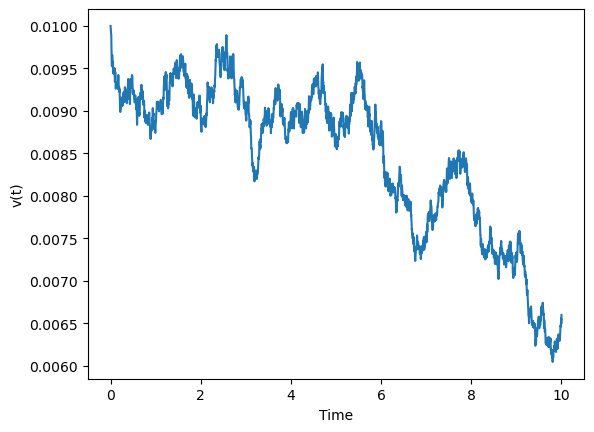

In [4]:
i = 0
plt.plot(torch.linspace(0, n_steps*dt, n_steps+1), cir_paths[i])
plt.ylabel('v(t)')
plt.xlabel('Time')
plt.show()

## Simulation by Diego Barba

Source: [https://towardsdatascience.com/stochastic-processes-simulation-the-cox-ingersoll-ross-process-c45b5d206b2b](https://towardsdatascience.com/stochastic-processes-simulation-the-cox-ingersoll-ross-process-c45b5d206b2b)

In [5]:
@dataclass
class CIRParams:
    """CIR process params, 2ab has to be larger or equal then c^2."""

    a: float  # mean reversion parameter
    b: float  # asymptotic mean
    c: float  # Brownian motion scale factor (standard deviation)

    def __post_init__(self) -> Optional[NoReturn]:
        if 2 * self.a * self.b < self.c ** 2:
            raise ValueError("2ab has to be less than or equal to c^2.")
        return None


def get_dW(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Sample T times from a normal distribution,
    to simulate discrete increments (dW) of a Brownian Motion.
    Optional random_state to reproduce results.
    """
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, T)


def get_CIR_process(
        T: int,
        CIR_params: CIRParams,
        sigma_0: Optional[float] = None,
        random_state: Optional[int] = None,
) -> np.ndarray:
    """
    - T is the sample size.
    - CIR_params is an instance of CIRParams dataclass.
    - sigma_0 the initial value for the process, if None, then sigma_0 is taken
        to be b (the asymptotic mean).
    Returns a 1D array.
    """
    dW = get_dW(T, random_state)
    return _generate_CIR_process(dW, CIR_params, sigma_0)


def _generate_CIR_process(
        dW: np.ndarray,
        CIR_params: CIRParams,
        sigma_0: Optional[float] = None,
) -> np.ndarray:
    """
    Generate the CIR process given the Brownian motion.
    - dW is a 1D array with the Brownian motion increments.
    - CIR_params is an instance of CIRParams dataclass.
    - sigma_0 the initial value for the process, if None, then sigma_0 is taken
        to be b (the asymptotic mean).
    Returns a 1D array.
    """
    T = len(dW)
    _sigma_0 = _select_sigma_0(sigma_0, CIR_params)
    sigma_t = [_sigma_0]
    for t in range(1, T):
        dsigma_t = (
                CIR_params.a * (CIR_params.b - sigma_t[t - 1])
                + CIR_params.c * np.sqrt(sigma_t[t - 1]) * dW[t]
        )
        # if Nan in simulation raise an error.
        _validate_not_nan(dsigma_t)
        sigma_t.append(sigma_t[t - 1] + dsigma_t)
    return np.asarray(sigma_t)


def _select_sigma_0(
        sigma_0_in: Optional[float], CIR_params: CIRParams
) -> float:
    """Returns sigma_0input if not None, else b (the long term mean)."""
    if sigma_0_in is not None:
        return sigma_0_in
    return CIR_params.b


def _validate_not_nan(dsigma_t: Any) -> Optional[NoReturn]:
    if np.isnan(dsigma_t):
        raise ValueError(
            "CIR process simulation crashed, check your CIR_params. "
            + "Maybe choose a smaller c value."
        )
    return None

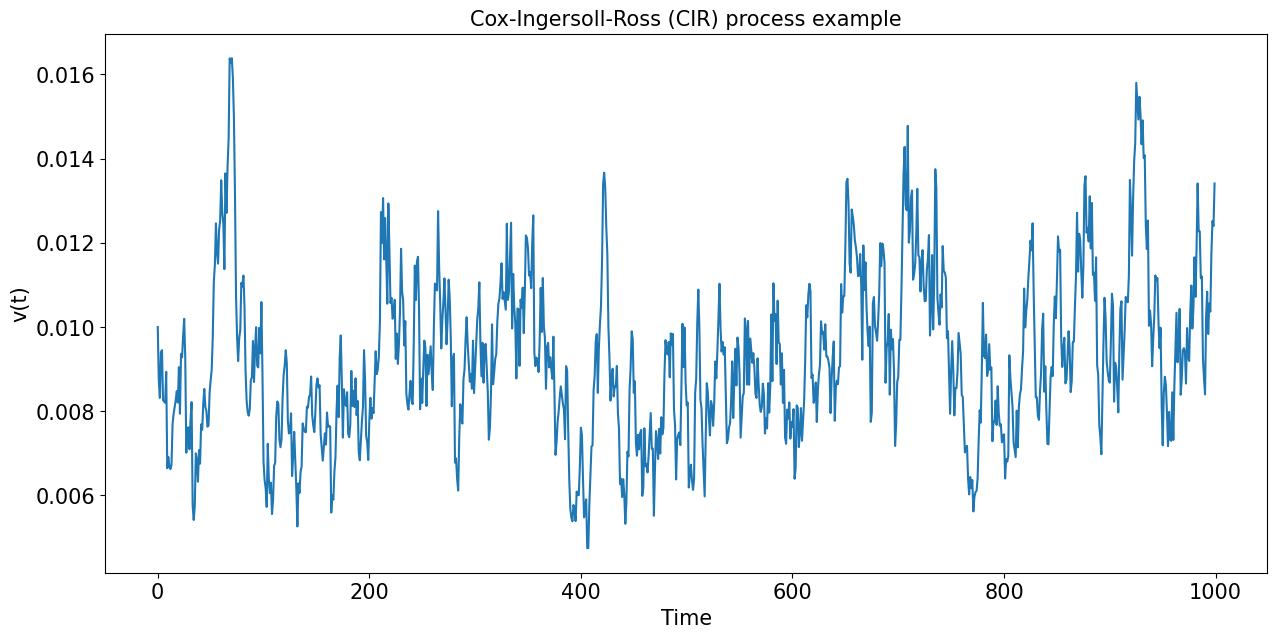

In [6]:
CIR_params = CIRParams(a=kappa, b=theta, c=xi)
CIR_proc = get_CIR_process(1_000, CIR_params)

fig = plt.figure(figsize=(15, 7))

title = "Cox-Ingersoll-Ross (CIR) process example"
plt.plot(CIR_proc)
plt.gca().set_title(title, fontsize=15)
plt.gca().set_xlabel('Time', fontsize=15)
plt.gca().set_ylabel('v(t)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Heston simulation

In [7]:
heston_paths = torch.jit.load('../../cmake-build-debug/test/quant/heston_paths.pt').state_dict()['0']

In [8]:
var_paths = torch.jit.load('../../cmake-build-debug/test/quant/var_paths.pt').state_dict()['0']

In [9]:
def plot_heston(i):
    time = torch.linspace(0, n_steps*dt, n_steps+1)
    plt.plot(time, heston_paths[i])
    plt.ylabel('S')
    plt.xlabel('Time')
    plt.show()

    plt.plot(time, var_paths[i])
    plt.ylabel('Variance')
    plt.xlabel('Time')
    plt.show()

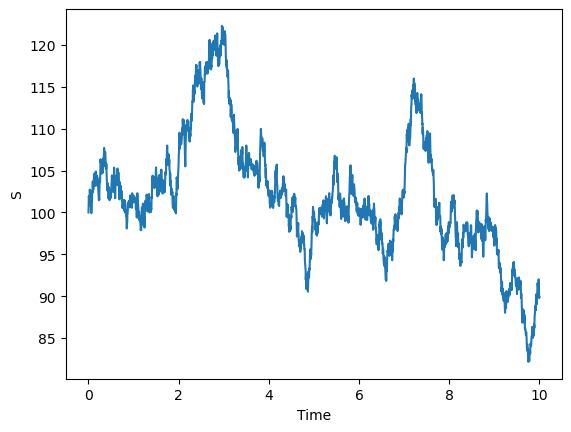

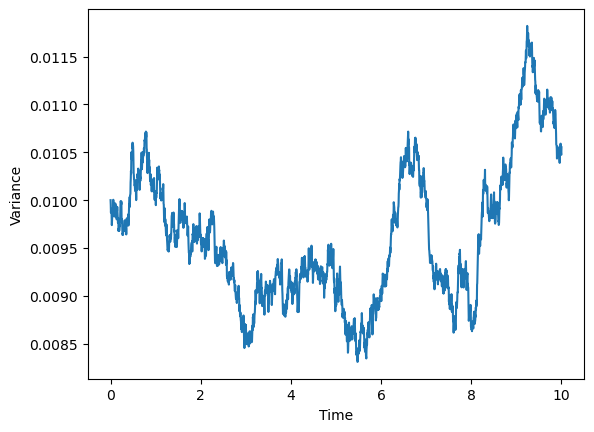

In [10]:
plot_heston(6)

## Simulation by Grzelak (using numpy for sampling from non-central chi-squared distribution)

Source: [https://github.com/LechGrzelak/QuantFinanceBook/blob/master/PythonCodes/Chapter%2009/Tab09_02.py](https://github.com/LechGrzelak/QuantFinanceBook/blob/master/PythonCodes/Chapter%2009/Tab09_02.py)

In [11]:
def CIR_Sample(NoOfPaths,kappa,gamma,vbar,s,t,v_s):
    delta = 4.0 *kappa*vbar/gamma/gamma
    c = 1.0/(4.0*kappa)*gamma*gamma*(1.0-np.exp(-kappa*(t-s)))
    kappaBar = 4.0*kappa*v_s*np.exp(-kappa*(t-s))/(gamma*gamma*(1.0-np.exp(-kappa*(t-s))))
    sample = c * np.random.noncentral_chisquare(delta,kappaBar,NoOfPaths)
    return sample

def GeneratePathsHestonAES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0):
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    V = np.zeros([NoOfPaths, NoOfSteps+1])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    V[:,0]=v0
    X[:,0]=np.log(S_0)

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])
        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]

        # Exact samples for the variance process

        V[:,i+1] = CIR_Sample(NoOfPaths,kappa,gamma,vbar,0,dt,V[:,i])
        k0 = (r -rho/gamma*kappa*vbar)*dt
        k1 = (rho*kappa/gamma -0.5)*dt - rho/gamma
        k2 = rho / gamma
        X[:,i+1] = X[:,i] + k0 + k1*V[:,i] + k2 *V[:,i+1] + np.sqrt((1.0-rho**2)*V[:,i])*(W1[:,i+1]-W1[:,i])
        time[i+1] = time[i] + dt

    # Compute exponent

    S = np.exp(X)
    paths = {"time": time, "S": S, "V": V}
    return paths

In [12]:
paths_grzelak = GeneratePathsHestonAES(n_paths, n_steps, dt * n_steps, 0, S0, kappa, xi, rho, theta, v0)

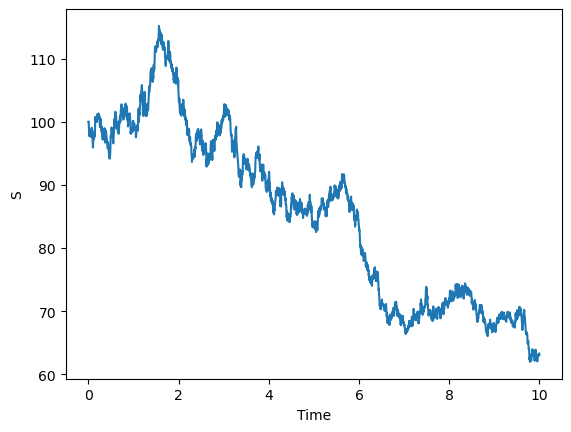

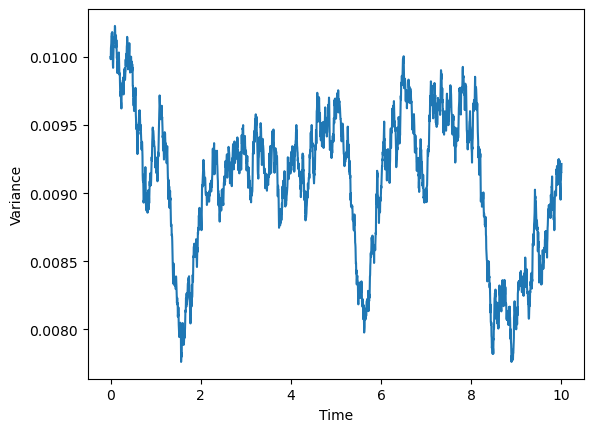

In [13]:
i = 5

plt.plot(paths_grzelak['time'], paths_grzelak['S'][i])
plt.ylabel('S')
plt.xlabel('Time')
plt.show()

plt.plot(paths_grzelak['time'], paths_grzelak['V'][i])
plt.ylabel('Variance')
plt.xlabel('Time')
plt.show()

# Monte-Carlo pricing of European Vanilla Option with Heston underlying

In [14]:
# list of strikes from code from supplementary materials to [Cui2017]
karr = [
    0.9371, 0.8603, 0.8112, 0.7760, 0.7470, 0.7216, 0.6699, 0.6137,
    0.9956, 0.9868, 0.9728, 0.9588, 0.9464, 0.9358, 0.9175, 0.9025,
    1.0427, 1.0463, 1.0499, 1.0530, 1.0562, 1.0593, 1.0663, 1.0766,
    1.2287, 1.2399, 1.2485, 1.2659, 1.2646, 1.2715, 1.2859, 1.3046,
    1.3939, 1.4102, 1.4291, 1.4456, 1.4603, 1.4736, 1.5005, 1.5328]
karr = [k*S0 for k in karr]

# list of expiries
tarr = [0.119047619047619, 0.238095238095238, 0.357142857142857,
        0.476190476190476, 0.595238095238095, 0.714285714285714,
        1.07142857142857, 1.42857142857143, 0.119047619047619,
        0.238095238095238, 0.357142857142857, 0.476190476190476,
        0.595238095238095, 0.714285714285714, 1.07142857142857,
        1.42857142857143, 0.119047619047619, 0.238095238095238,
        0.357142857142857, 0.476190476190476, 0.595238095238095,
        0.714285714285714, 1.07142857142857, 1.42857142857143,
        0.119047619047619, 0.238095238095238, 0.357142857142857,
        0.476190476190476, 0.595238095238095, 0.714285714285714,
        1.07142857142857, 1.42857142857143, 0.119047619047619,
        0.238095238095238, 0.357142857142857, 0.476190476190476,
        0.595238095238095,	0.714285714285714, 1.07142857142857,
        1.42857142857143]

assert len(karr) == len(tarr)

In [15]:
def call_payoff(S, K):
    return np.maximum(S - K, 0)

In [16]:
price_arr = []
for i in range(len(karr)):
    expiry_idx = np.argmin(np.abs(np.linspace(0, n_steps*dt, n_steps+1) - tarr[i]))
    price = call_payoff(heston_paths[:, expiry_idx], karr[i]).mean().item()
    price_arr.append(price)

In [17]:
import pandas as pd
df = pd.DataFrame({'K': karr, 'T': tarr, 'Price MC': price_arr})
print(df)

         K         T   Price MC
0    93.71  0.119048   6.376761
1    86.03  0.238095  14.016365
2    81.12  0.357143  18.879180
3    77.60  0.476190  22.405266
4    74.70  0.595238  25.336611
5    72.16  0.714286  27.848199
6    66.99  1.071429  33.097602
7    61.37  1.428571  38.611195
8    99.56  0.119048   1.643598
9    98.68  0.238095   2.713136
10   97.28  0.357143   3.960514
11   95.88  0.476190   5.285516
12   94.64  0.595238   6.477593
13   93.58  0.714286   7.474023
14   91.75  1.071429   9.518242
15   90.25  1.428571  11.038494
16  104.27  0.119048   0.193801
17  104.63  0.238095   0.482308
18  104.99  0.357143   0.708797
19  105.30  0.476190   0.938264
20  105.62  0.595238   1.139405
21  105.93  0.714286   1.304441
22  106.63  1.071429   1.783108
23  107.66  1.428571   2.027898
24  122.87  0.119048   0.000000
25  123.99  0.238095   0.000000
26  124.85  0.357143   0.000000
27  126.59  0.476190   0.000216
28  126.46  0.595238   0.001643
29  127.15  0.714286   0.002863
30  128.